## Credit Card Default — Feature Importance

This notebook analyzes feature importance from a Random Forest model to understand
which variables most strongly influence default predictions and how these insights
translate into credit risk understanding.


## Importing Libraries and loading the dataset

In [13]:
import pandas as pd    
import numpy as np  
import matplotlib.pyplot as plt         
import joblib        
from sklearn.model_selection import train_test_split   
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, classification_report, confusion_matrix


cd = pd.read_csv("../data/credit_default.csv")

cd.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Separating Features and Target variables

In [3]:
X = cd.drop(columns=['ID','default.payment.next.month'])
y = cd['default.payment.next.month'].astype(int)

print("Dataset shape:", cd.shape)
print("X shape:", X.shape, "| y shape:", y.shape)
print("Target distribution:\n", y.value_counts(normalize=True))

Dataset shape: (30000, 25)
X shape: (30000, 23) | y shape: (30000,)
Target distribution:
 default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


## Applying Train/Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20, stratify=y, shuffle=True)

## Loading Trained Random Forest Model

In [8]:
rf_controlled = joblib.load("../models/rf_controlled.pkl")

## Extract Feature Importances

In [11]:
# Extracting raw importances
importances = rf_controlled.feature_importances_

# Build DataFrame
feature_importance_df = pd.DataFrame({"features" : X_train.columns, "importance": importances})

# Sorting 

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)
feature_importance_df

,features,importance
0,PAY_0,0.304274
1,PAY_2,0.139646
2,PAY_3,0.076306
3,PAY_4,0.071897
4,PAY_5,0.053100
5,PAY_6,0.052203
6,LIMIT_BAL,0.046316
7,PAY_AMT1,0.039045
8,PAY_AMT2,0.033655
9,PAY_AMT3,0.028255


## Visualizing Top 15 Importances

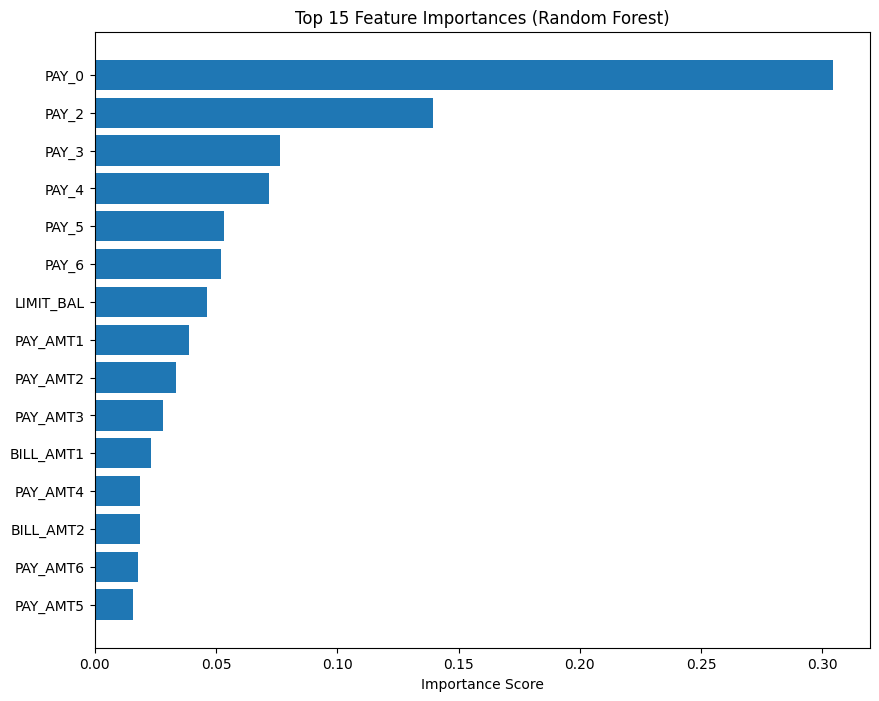

In [16]:
plt.figure(figsize=(10, 8))
plt.barh(
    feature_importance_df.head(15)['features'], 
    feature_importance_df.head(15)['importance'])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

### Interpretation of Top Features

Payment history features dominate feature importance, indicating that recent
repayment behavior is the strongest predictor of default risk. Credit limits
and bill amounts contribute secondary signals, while demographic variables
play a smaller role.


### Comparison with Domain Expectations

The importance ranking aligns with credit risk theory, where behavioral signals
(payment delays) outweigh static demographic attributes. This consistency
increases confidence in the model.


### Stability and Limitations

Feature importance in Random Forests can be biased toward variables with higher
variance or more split points. Importance scores should be interpreted as
relative, not causal.


### Comparison with Logistic Regression

Comparing Random Forest importance with Logistic Regression coefficients can
highlight agreement or disagreement between linear and non-linear models.


### Business Implications

- Customers with recent payment delays represent the highest default risk.
- Early warning systems should prioritize behavioral features.
- Demographic attributes alone are insufficient for risk assessment.


### Day 30 Summary

- Random Forest feature importance identifies key risk drivers.
- Payment behavior is the strongest signal for default prediction.
- Importance scores support risk monitoring and intervention strategies.
- Interpretability is essential for trust in ML models.
